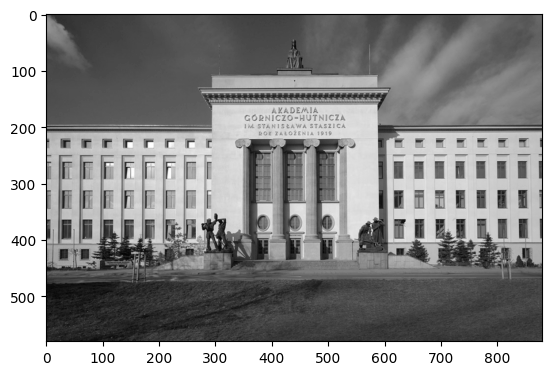

In [25]:
import cv2
from matplotlib import pyplot as plt

# a) Proszę wczytać przykładowy obraz (pierwszy z laboratorium 3).

image_bgr = cv2.imread("res/lab3_1.jpg")
image = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)
plt.imshow(image, cmap="gray")

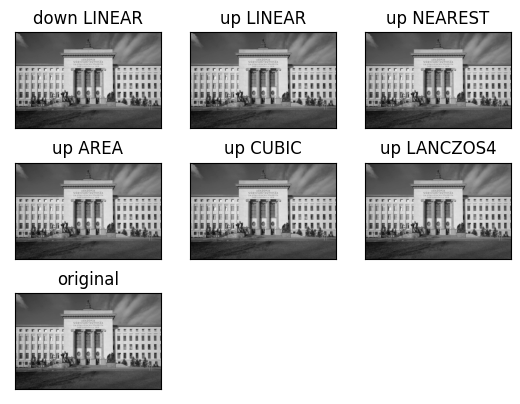

In [26]:
# b) Proszę sprawdzić i porównać wynik następującej operacji:

# b.1) zmniejszania rozmiaru obrazu o 50 % - jedną z wybranych metod
image_down = cv2.resize(image, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_LINEAR)

# b.2) a następnie zwiększenie o 50% z użyciem wszystkich dostępnych w OpenCV metod interpolacji.
image_up1 = cv2.resize(image, None, fx=1.5, fy=1.5, interpolation=cv2.INTER_LINEAR)
image_up2 = cv2.resize(image, None, fx=1.5, fy=1.5, interpolation=cv2.INTER_NEAREST)
image_up3 = cv2.resize(image, None, fx=1.5, fy=1.5, interpolation=cv2.INTER_AREA)
image_up4 = cv2.resize(image, None, fx=1.5, fy=1.5, interpolation=cv2.INTER_CUBIC)
image_up5 = cv2.resize(image, None, fx=1.5, fy=1.5, interpolation=cv2.INTER_LANCZOS4)


# b.3) Proszę porównać uzyskany wynik z obrazem pierwotnym.
titles = [
    "down LINEAR",
    "up LINEAR",
    "up NEAREST",
    "up AREA",
    "up CUBIC",
    "up LANCZOS4",
    "original",
]
images = [image_down, image_up1, image_up2, image_up3, image_up4, image_up5, image]

for i in range(7):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i], "gray")
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])

plt.show()

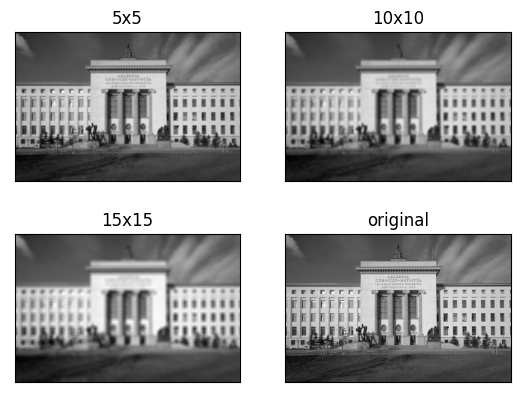

In [27]:
# c) Proszę nałożyć na obraz filtr uśredniający o macierzy K w rozmiarze 5x5, 10x10 i 15x15.

img1 = cv2.blur(image, (5, 5))
img2 = cv2.blur(image, (10, 10))
img3 = cv2.blur(image, (15, 15))

titles = ["5x5", "10x10", "15x15", "original"]
images = [img1, img2, img3, image]

for i in range(4):
    plt.subplot(2, 2, i + 1)
    plt.imshow(images[i], "gray")
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])

plt.show()

# Q: Jaki efekt został zaobserwowany?
# A: Rozmycie / Blur

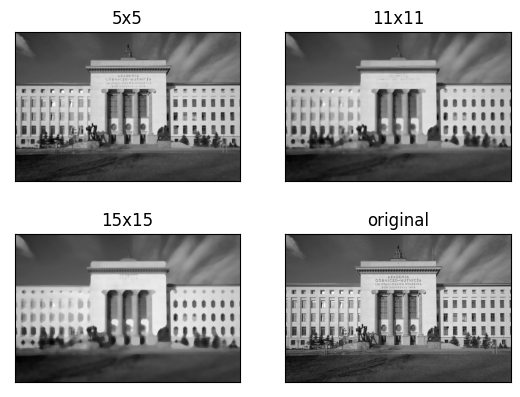

In [28]:
# d) Proszę nałożyć na obraz filtr medianowy o rozmiarze 5x5, 11x11 i 15x15.

med_img1 = cv2.medianBlur(image, 5)
med_img2 = cv2.medianBlur(image, 11)
med_img3 = cv2.medianBlur(image, 15)

titles = ["5x5", "11x11", "15x15", "original"]
images = [med_img1, med_img2, med_img3, image]

for i in range(4):
    plt.subplot(2, 2, i + 1)
    plt.imshow(images[i], "gray")
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])

plt.show()

# Q: Jaki efekt został zaobserwowany?
# A: Rozmycie, ale krawedzie pozostaja wyrazne

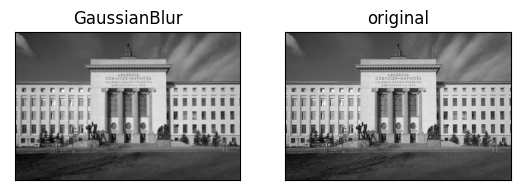

In [29]:
# e) Proszę nałożyć na obraz filtr gaussowski (o rozmiarze 5)
gauss_img = cv2.GaussianBlur(image, ksize=(5, 5), sigmaX=0)
titles = ["GaussianBlur", "original"]
images = [gauss_img, image]

for i in range(2):
    plt.subplot(1, 2, i + 1)
    plt.imshow(images[i], "gray")
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])

plt.show()

# Q: zaobserwować uzyskane wyniki.
# A: Rozmycie gwaltowanie zmieniajacych sie fragmentow obrazu

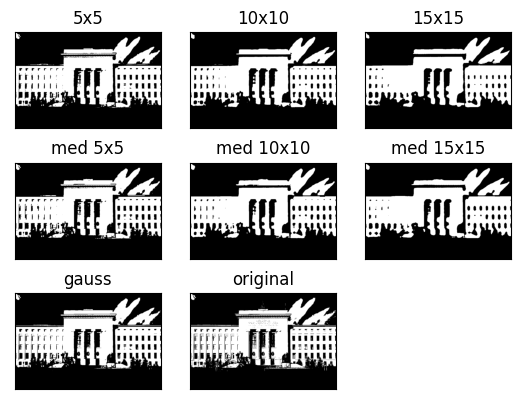

In [30]:
# f) Proszę zbinaryzować obraz po przefiltrowaniu go powyższymi metodami i porównać do
#    binaryzacji bez filtracji.

_, bin0 = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
_, bin1 = cv2.threshold(img1, 127, 255, cv2.THRESH_BINARY)
_, bin2 = cv2.threshold(img2, 127, 255, cv2.THRESH_BINARY)
_, bin3 = cv2.threshold(img3, 127, 255, cv2.THRESH_BINARY)
_, med_bin1 = cv2.threshold(med_img1, 127, 255, cv2.THRESH_BINARY)
_, med_bin2 = cv2.threshold(med_img2, 127, 255, cv2.THRESH_BINARY)
_, med_bin3 = cv2.threshold(med_img3, 127, 255, cv2.THRESH_BINARY)
_, gauss_bin = cv2.threshold(gauss_img, 127, 255, cv2.THRESH_BINARY)

titles = ["5x5", "10x10", "15x15", "med 5x5", "med 10x10", "med 15x15", "gauss", "original"]
images = [bin1, bin2, bin3, med_bin1, med_bin2, med_bin3, gauss_bin, bin0]

for i in range(8):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i], "gray")
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])

plt.show()

# Binaryzacja bez filtracji zachowuje wiecej szczegolow, podczas gdy po filtracji obrazy
# zbinaryzowane zachowuja wyraznie jedynie kontury znajdujacych sie na nich obiektow.
# 
# Przy czym porownujac obrazy przefiltrowane i zbinaryzowane mozna dojsc do wniosku, ze filtr
# medianowy zatraca najwiecej informacji z pierwotnego obrazu.

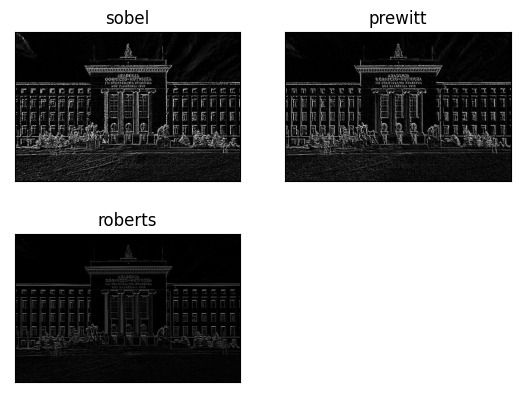

In [31]:
# g) Proszę nałożyć na obraz filtry Roberts cross, Prewitta i Sobela.

import numpy as np


def apply_filter_to_image(image: cv2.Mat, kernelx: np.ndarray, kernely: np.ndarray):
    imgx = cv2.filter2D(image, -1, kernelx)
    imgy = cv2.filter2D(image, -1, kernely)
    return imgx + imgy


roberts = apply_filter_to_image(
    image,
    np.array([[0, 1], [-1, 0]]),
    np.array([[1, 0], [0, -1]]),
)
prewitt = apply_filter_to_image(
    image,
    np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]]),
    np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]]),
)
sobel = apply_filter_to_image(
    image,
    np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]]),
    np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]]),
)

titles = ["sobel", "prewitt", "roberts"]
images = [sobel, prewitt, roberts]

for i in range(3):
    plt.subplot(2, 2, i + 1)
    plt.imshow(images[i], "gray")
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])

plt.show()

# Filtr Sobela, w porownaniu do filtru Prewitta oraz Robertsa, zachowuje najwiecej szczegolow
# z obrazu pierwotnego.

#! ODDAJ SPRAWOZDANIE DO 4.04.2023!!!